## 🧑‍💻**Factor Analysis**
- Factor analysis is a statistical method for **reducing dimensionality** and **identifying latent factors** in a dataset. <br>
- It is frequently employed in fields like psychology, economics, and the social sciences to comprehend the connections among observed variables. <br>
- The core assumption of factor analysis is that a smaller set of latent factors can account for the observed variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [4]:
# Load Wine dataset
wine = load_wine(as_frame=True)
data = wine.data  # only features, no target

In [5]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


🔍 [Data Link](https://archive.ics.uci.edu/dataset/109/wine)

🧑‍💻**Data Structures**

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [16]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [19]:
print(data.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


🧑‍💻**Factor Analysis**

In [6]:
# Apply Bartlett's test
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Chi-Square value: {chi_square_value:.3f}, p-value: {p_value:.3f}")

Chi-Square value: 1317.181, p-value: 0.000


**Comment:** Here Bartlett’s test p-value <0.05 that indicates it's  suitable for factor analysis.

In [7]:
# Apply KMO test
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Model: {kmo_model:.3f}")

KMO Model: 0.779


**Comment:** Here KMO of 0.779 indicates adequate sampling adequacy, meaning this data is suitable for factor analysis.

In [8]:
# Create FactorAnalyzer object and fit
fa = FactorAnalyzer(rotation="varimax")
fa.fit(data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [9]:
# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()

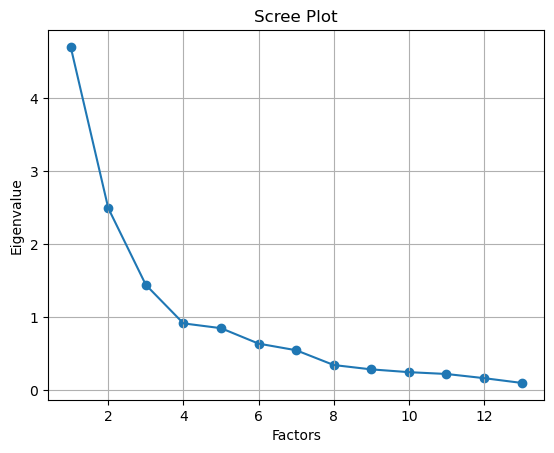

In [10]:
plt.scatter(range(1, data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [11]:
# Perform factor analysis with chosen number of factors
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [12]:
# Factor loadings
loadings = pd.DataFrame(fa.loadings_, index=data.columns, columns=["Factor1", "Factor2", "Factor3"])
print("\nFactor Loadings:\n", loadings)


Factor Loadings:
                                Factor1   Factor2   Factor3
alcohol                       0.035312  0.797974 -0.065666
malic_acid                   -0.494937  0.093006  0.227728
ash                           0.025898  0.312247  0.726860
alcalinity_of_ash            -0.300980 -0.305777  0.752131
magnesium                     0.167642  0.396137  0.120802
total_phenols                 0.798142  0.336009  0.034061
flavanoids                    0.920812  0.262887  0.016319
nonflavanoid_phenols         -0.519761 -0.170054  0.244057
proanthocyanins               0.591530  0.221014  0.019025
color_intensity              -0.427445  0.711506  0.113094
hue                           0.678037 -0.175684 -0.144426
od280/od315_of_diluted_wines  0.862281 -0.011199 -0.032300
proline                       0.375555  0.727213 -0.099472


**Comment:** The factor analysis of the wine dataset revealed three main latent dimensions. Factor 1, the Phenolic Compounds Factor, is characterized by high loadings on flavanoids (0.921), OD280/OD315 (0.862), total phenols (0.798), proanthocyanins (0.592), and hue (0.678). This factor represents the wine’s polyphenol and flavonoid content, which are associated with taste, bitterness, and aging potential. Factor 2, the Alcohol & Color Intensity Factor, shows strong loadings on alcohol (0.798), proline (0.728), and color intensity (0.712), capturing attributes related to alcohol strength, color richness, and associated compounds. Factor 3, the Acidity & Minerals Factor, has high loadings on alcalinity of ash (0.752), ash (0.727), and a moderate loading on malic acid (0.228), reflecting the wine’s acidity and mineral characteristics that influence freshness and tartness.



In [13]:
# Variance explained by each factor
variance = fa.get_factor_variance()
variance_df = pd.DataFrame({
    "SS Loadings": variance[0],
    "Proportion Var": variance[1],
    "Cumulative Var": variance[2]
}, index=["Factor1", "Factor2", "Factor3"])
print("\nVariance Explained:\n", variance_df)


Variance Explained:
          SS Loadings  Proportion Var  Cumulative Var
Factor1     3.997571        0.307505        0.307505
Factor2     2.319182        0.178399        0.485904
Factor3     1.270732        0.097749        0.583653
